# The Bias-Variance Tradeoff

In continuing with our work on regression for predictive modeling we'll discuss the problem of overfitting and introduce a key concept in all predictive modeling, the bias-variance tradeoff.

## What We'll Accomplish in This Notebook

We will:
- Discuss ways you can overfit regression models
- Derive the bias-variance tradeoff formula
- See the tradeoff in action with a synthetic data set

Let's do it!

In [1]:
# import the packages we'll use
## For data handling
import pandas as pd
import numpy as np
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Overfitting

A big problem that can occur when building a predictive modeling is overfitting to the training data. When you can perform cross-validation this is somewhat mitigated. However, due to various limitations it may not be possible to perform cross-validation for model selection.

We'll first show you two ways in which overfitting can occur, then we'll show the theoretical reasons that overfitting occurs.

### You Code


### Including Too Many Features

One way to overfit a model is to include too many features into the model.

You'll work through an extreme example of this now.

In [2]:
## Generate some data.
np.random.seed(440)

X_train = np.random.randint(1,100,(20,4))

y_train = np.random.randint(1,100,20)


X_test = np.random.randint(1,100,(20,4))

y_test = np.random.randint(1,100,20)

print("X=",X_train)
print()
print("y=",y_train)

X= [[84 23 19 62]
 [82 48  8 83]
 [36 50 56 98]
 [57 29 96 78]
 [44 51 85 26]
 [68 35 29 30]
 [22 83 63 78]
 [71 70 46 86]
 [88 87 62 96]
 [70 48 89 13]
 [51 85 56 43]
 [23 44 40 88]
 [63 16 12 74]
 [10 82 10 12]
 [69 28 45 50]
 [71 66 26 47]
 [38 11  7 27]
 [46 14  6  9]
 [30 25 61 65]
 [52 48 10 41]]

y= [30 70 62 40 98 66 56 54 86 44  5 39 25 90 63 74 30 84 24 46]


Now iteratively add in each column of $X$ in models predicting $y$, i.e. fit all of the following models:
$$
y = \beta_0 + \beta_1 X_1 + \epsilon
$$

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
$$

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon
$$

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \epsilon
$$

Print out the training MSE for each model, at the same time print out the testing MSE.

In [3]:
## Import Linear Regression
from sklearn.linear_model import LinearRegression

In [4]:
## Use this function to quickly get the MSE
def get_mse(model,X,y):
    pred = model.predict(X)
    return np.sum(np.power(pred-y,2))/len(y)

In [5]:
## Fit your models and print out the Training and Testing MSE here


## Sample Answer
for i in range(1,5):
    reg = LinearRegression(copy_X = True)
    
    print("Model",i)
    if i == 1:
        reg.fit(X_train[:,:i].reshape(-1,1),y_train)
        print("Training MSE:", np.round(get_mse(reg,X_train[:,:i].reshape(-1,1),y_train),4))
        print("Testing MSE:", np.round(get_mse(reg,X_test[:,:i].reshape(-1,1),y_test),4))
    else:
        reg.fit(X_train[:,:i],y_train)
        print("Training MSE:", np.round(get_mse(reg,X_train[:,:i],y_train),4)) 
        print("Testing MSE:", np.round(get_mse(reg,X_test[:,:i],y_test),4))
    print()

Model 1
Training MSE: 598.7587
Testing MSE: 1104.5408

Model 2
Training MSE: 550.8765
Testing MSE: 1168.744

Model 3
Training MSE: 543.4734
Testing MSE: 1156.7976

Model 4
Training MSE: 509.0902
Testing MSE: 1185.8096



##### What do you notice?

Write your notes here:


Notice that the training MSE improves with each feature we add to the model, but importantly the test error is roughly the same from model to model.





### High Degree Polynomials

Another common way to display overfitting the data is to add too high a degree of polynomials to the data. You'll construct an example to show the issue.

In [28]:
## Use these are your train and test data
x_train = np.linspace(-1.5,1.5,500)
x_test = np.linspace(-1.5,1.5,500)

In [29]:
## making y_test and y_train
y_train = .1 + .2*x_train**2 + .5*x_train**4 - .5*x_train**5 + .7*np.random.randn(500)
y_test = .1 + .2*x_test**2 + .5*x_test**4 - .5*x_test**5 + .7*np.random.randn(500)

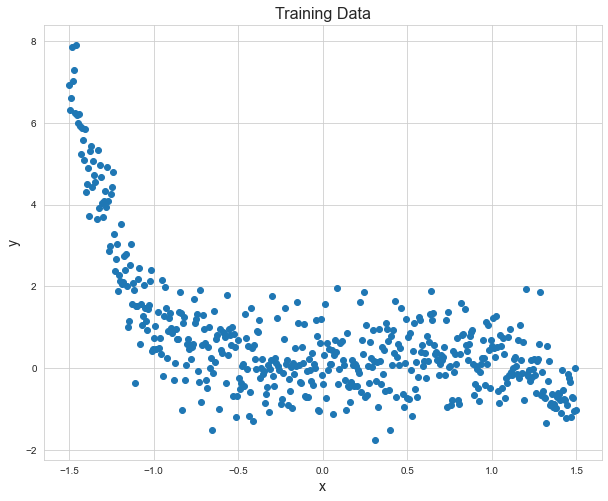

In [30]:
## plot y_train against x_train

plt.figure(figsize=(10,8))

plt.scatter(x_train,y_train)

plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)

plt.title("Training Data", fontsize=16)


plt.show()


In [31]:
## Import things we'll need
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [32]:
# Make a loop from i = 1 to 31, skipping the even numbers,

# for each i make a pipeline that transforms x
# into a polynomial array of degree i
# then fit a regression of y on the powers of x
# record both the training set mse and the test set mse

train_mse = []
test_mse = []

for i in range(1,33,2):
    pipe = Pipeline([('poly',PolynomialFeatures(degree=i,include_bias=False)),
                    ('reg',LinearRegression(copy_X = True))])
    
    pipe.fit(x_train.reshape(-1,1),y_train)

    train_mse.append(get_mse(pipe,x_train.reshape(-1,1),y_train))
    test_mse.append(get_mse(pipe,x_test.reshape(-1,1),y_test))




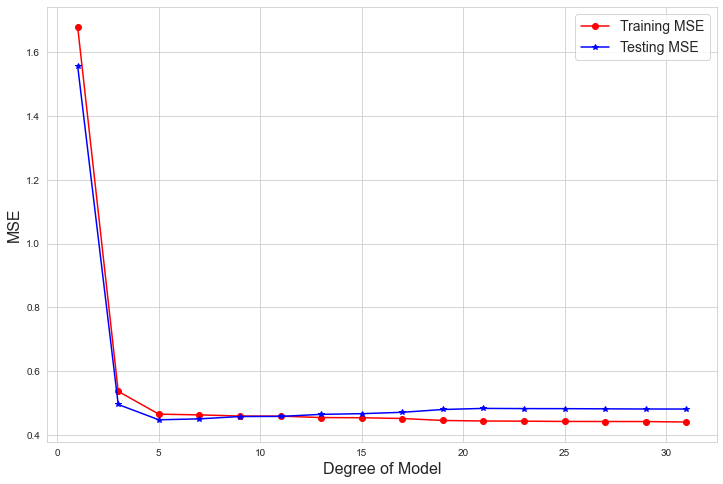

In [33]:
# Plot the degree vs the corresponding training and test mses
# Label them so you know which is which.

plt.figure(figsize=(12,8))

plt.plot(range(1,33,2),train_mse,
         'r-o', label = "Training MSE")
plt.plot(range(1,33,2),test_mse,
            'b-*',label="Testing MSE")

plt.xlabel("Degree of Model", fontsize=16)
plt.ylabel("MSE", fontsize=16)

plt.legend(fontsize=14)


plt.show()

##### What did you notice?

Take a moment to write down what you observed through this exercise here.

As the degree of the model is increased after and initial dramatic decrease the training mse decreases while the testing mse increases.





## The Bias-Variance Trade-Off

Let's return to our statistical learning framework from Notebook 1. Remember we try to fit the following model:
$$
y = f(X) + \epsilon,
$$
where $f$ is some function.

When we fit the model we produce some estimate of $f$ called $\hat{f}$. 

As we've discussed we're interested in the generalization error of our algorithm, which so far has been the test MSE. Like with CV when we consider the generalization error we look at the expected value of the squared difference between $y$ and $\hat{y}$. If we let $y_0$ and $X_0$ denote a single test set, we can write this mathematically as:
$$
E\left[ \left( y_0 - \hat{y_0} \right)^2 \right]= E\left[ \left( y_0 - \hat{f}(X_0) \right)^2 \right] = E \left[ \left( f(X_0) - \hat{f}(X_0) + \epsilon   \right)^2 \right],
$$
where all expectations are taken over the training space.

With a little manipulation you can rewrite this as:
$$
\text{Var}\left(\hat{f}(X_0)\right) + \left[ \text{Bias}\left( \hat{f}(X_0) \right) \right]^2 + \text{Var}(\epsilon)
$$
$$
= \text{Variance of }\hat{f} + \text{Bias squared of }\hat{f} + \text{irreducible error}.
$$

If $\text{Bias}$ is unfamiliar to you then, $\text{Bias}\left(\hat{f}(X)\right) = E\left( f(X) - \hat{f}(X) \right)$. One way to think about it is how far on average is the estimator $\hat{f}$ from the thing it is estimating, $f$.

Since $\text{Var}$ and $\text{Bias}^2$ are both nonnegative, the best we can do is produce an algorithm with irreducible error $\text{Var}(\epsilon)$. This means we can reduce our generalization error by reducing our $\text{Bias}$ or our $\text{Var}$. However, it is often not possible to reduce both simultaneously. Many times lowering an algorithm's $\text{Bias}$ leads to an increase in its $\text{Var}$. Typically high bias indicates underfitting the data, while high variance means overfitting.

We'll now show this in action with linear regression.

### Bias-Variance Trade-Off with Linear Regression

Let's build some toy data to play with

In [35]:
x = np.linspace(-3,3,500)
y = x*(x-1) + 1.2*np.random.randn(500)

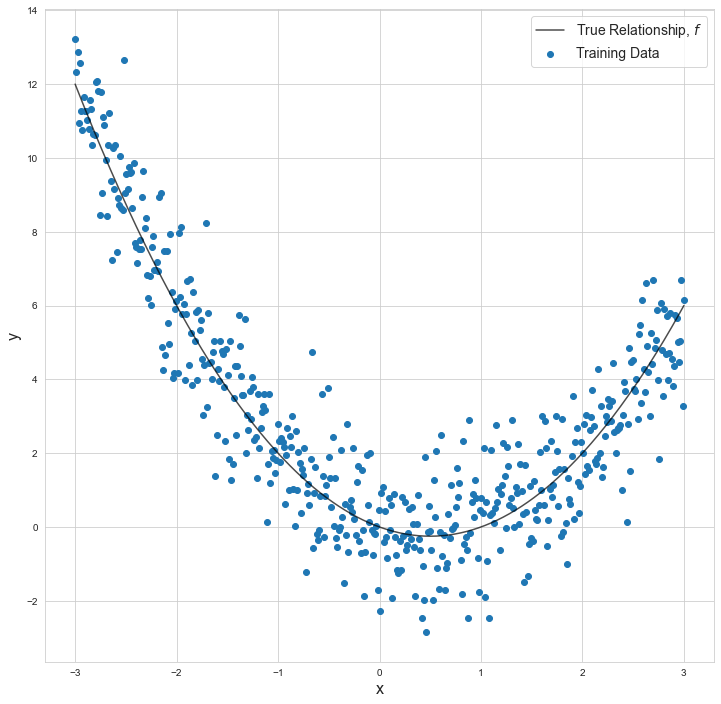

In [36]:
plt.figure(figsize = (12,12))

plt.plot(x, x*(x-1),'k', label = "True Relationship, $f$", alpha = .7)
plt.scatter(x, y, label = "Training Data")

plt.ylabel("y", fontsize=16)
plt.xlabel("x", fontsize=16)

plt.legend(fontsize=14)

plt.show()

A linear regression model with high bias but low variance would be to use no predictors and just take the mean observed $y$ value. This would be way underfitting the data, which has a clear pattern. It is high bias because we are far from the true relationship between $y$ and $x$. It is low variance because with a large enough sample the law of large numbers tells us the sample mean should be close to $E(y)$. So as long as our training sample is large enough then we won't vary much over different samples.

A linear regression model with low bias but high variance would be to use a high degree polynomial of $x$. This is low bias because a high degree polynomial will more closely fit the true relationship. It will have high variance because as the degree of the fitting polynomial increases the more likely it is that the regression polynomial will attempt to fit all of the training points perfectly, meaning that you will get wildly different fits with each training set.

A goldilocks, not too cold not too hot, model would be one with a low degree polynomial. For this particular problem it would likely be a parabola model, but could be a slightly higher degree in practice.

In the following code block we fit three models five times. The first model just takes the mean of the training $y$ values. The second model is the "Goldilocks" model where we fit a parabola to the data. The final model is the high variance model where we fit a degree $20$ polynomial to the data. We then plot the predicted values for all 15 total model fits.

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

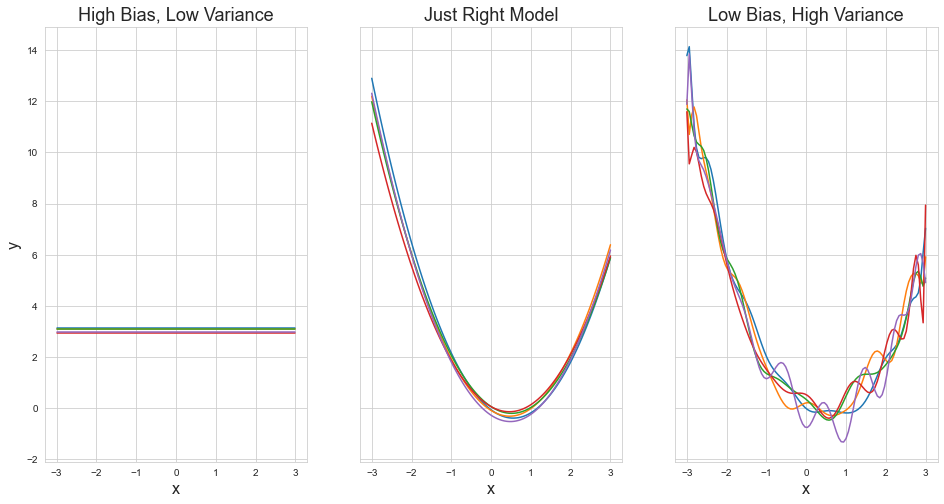

In [38]:
# We'll plot 5 instances of all 3 models
fig,ax = plt.subplots(1,3,figsize = (16,8), sharex = True, sharey = True)
bias = []


for i in range(5):

    # First generate a random training set
    x = np.linspace(-3,3,100)
    y = x*(x-1) + 1.2*np.random.randn(100)

    # Now fit the high variance model
    high_deg_pipe = Pipeline([('poly',PolynomialFeatures(20)),
                             ('reg', LinearRegression(copy_X = True))])

    high_deg_pipe.fit(x.reshape(-1,1),y)

    high_deg_line = high_deg_pipe.predict(x.reshape(-1,1))



    # Now fit the "goldilocks model", the true correct degree
    pipe = Pipeline([('poly',PolynomialFeatures(2)),
                    ('reg', LinearRegression(copy_X = True))])
    pipe.fit(x.reshape(-1,1),y)
    pipe_line = pipe.predict(x.reshape(-1,1))




    # Plot High Bias low Variance plot
    ax[0].plot(x, np.mean(y)*np.ones(len(x)), alpha = 1)
    ax[0].set_title("High Bias, Low Variance",fontsize=18)
    ax[0].set_ylabel("y", fontsize=16)
    ax[0].set_xlabel("x", fontsize=16)


    # Plot Goldilocks model
    ax[1].plot(x, pipe_line, alpha = 1)
    ax[1].set_title("Just Right Model",fontsize=18)
    ax[1].set_xlabel("x", fontsize=16)

    # Plot High Va model
    ax[2].plot(x, high_deg_line, alpha = 1)
    ax[2].set_title("Low Bias, High Variance",fontsize=18)
    ax[2].set_xlabel("x", fontsize=16)


plt.show()

## Questions?

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

Often the best model is the one that finds a balance between the Bias and the Variance. If you Google bias-variance trade-off, you'll see a picture like this along with links to tons of poorly written blog posts.
<img src="biasvariance.png"></img>

This picture shows that the place where the minimal generalization error occurs is near to where the Bias equals the Variance. Let's picture the average testing error as a function of different degrees for this data set.

In [39]:
# Generate a single test set
x_test = np.linspace(-3,3,100)
y_test = x_test*(x_test-1) + 1.2*np.random.randn(100)

In [40]:
test_errors = np.zeros((10,len(range(1,41))))

# We'll generate 10 training sets
for i in range(10):
    x = np.linspace(-3,3,100)
    y = x*(x-1) + 1.2*np.random.randn(100)

    for j in range(1,41):
        pipe = Pipeline([('poly',PolynomialFeatures(j)),
                             ('reg', LinearRegression(copy_X = True))])
        pipe.fit(x.reshape(-1,1),y)
        
        pred = pipe.predict(x_test.reshape(-1,1))
        test_errors[i,j-1] = np.sum((pred - y_test)**2)/len(y_test)

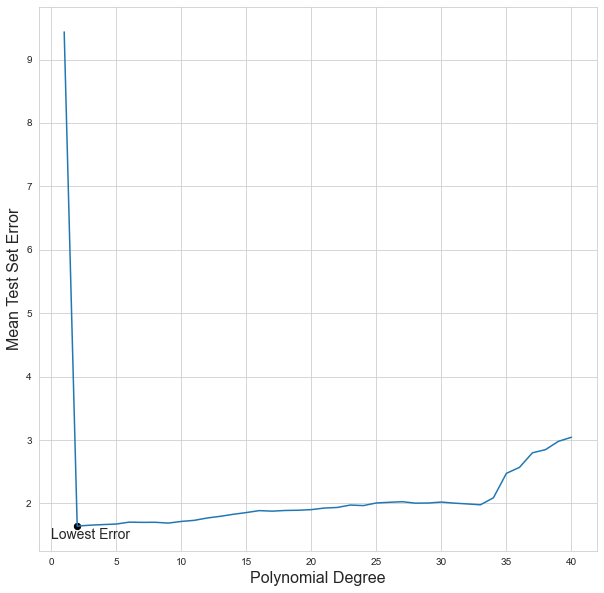

In [41]:
plt.figure(figsize = (10,10))

plt.plot(range(1,41), np.mean(test_errors,axis=0))

plt.xlabel("Polynomial Degree", fontsize = 16)
plt.ylabel("Mean Test Set Error", fontsize = 16)

plt.scatter(np.argmin(np.mean(test_errors,axis=0)) + 1, 
         np.min(np.mean(test_errors,axis=0)), s=40, c="black")

plt.text(np.argmin(np.mean(test_errors,axis=0)) - 1, 
         np.min(np.mean(test_errors,axis=0)-.2), 
         "Lowest Error", fontsize = 14)

plt.show()

As we suspected the lowest mean error occurred with the degree $2$ model. This is the model where Bias and Variance are equal or close to equal.


This isn't the last time we'll see the bias-variance trade-off in this course. A general rule of thumb to remember is that the "simpler" the model the more likely it is to have high bias$^2$ (underfit), the more "complex" a model the more likely it is to have high variance (overfit). Where what "simple" and "complex" means depends on the context of the problem.

That's it for this notebook. We'll learn about two techniques to have more complex models while avoiding overfitting in the next notebook.

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2021.

Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)